In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


In [ ]:
# 데이터를 1차원으로 펼치고 정규화 (Dense Layer 사용 시)
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255



In [ ]:
# 라벨을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# 모델 정의 (Linear 모델 + Softmax)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(28*28,), activation='softmax')
])

In [ ]:
# 손실 함수 및 옵티마이저 정의
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 학습
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))




Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4706 - accuracy: 0.8767 - val_loss: 0.3071 - val_accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - accuracy: 0.9156 - val_loss: 0.2824 - val_accuracy: 0.9211
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.9214 - val_loss: 0.2728 - val_accuracy: 0.9248
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9238 - val_loss: 0.2705 - val_accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9249 - val_loss: 0.2689 - val_accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2617 - accuracy: 0.9266 - val_loss: 0.2675 - val_accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2583 - accuracy: 0.9285 - val_loss: 0.2707 - val_accuracy:

In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 0s - loss: 0.2649 - accuracy: 0.9267 - 487ms/epoch - 2ms/step

Test accuracy: 0.9266999959945679


In [ ]:
# 예측 및 시각화
n_images = 3
test_images = x_test[:n_images]
predictions = model.predict(test_images)


1/1 [==============================] - 0s 84ms/step


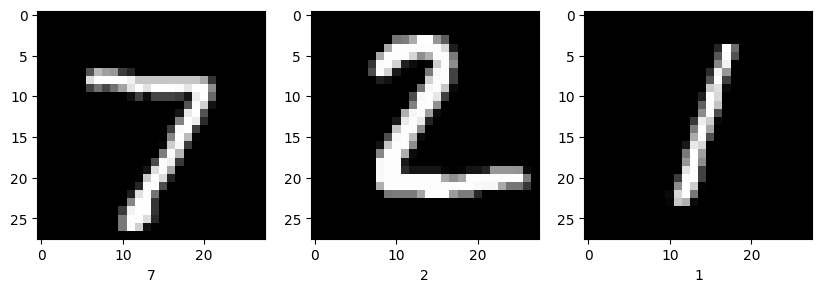

In [ ]:
# Display image and model prediction
plt.figure(figsize=(10, 10))
for i in range(n_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(np.reshape(test_images[i], (28, 28)), cmap='gray')
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
